- In every dataset we have different columns has different units

- In every dataset we have different columns has values varies from -infinity to infinity

- It is very important standardize the data, make sure all the column values under same range

- To achieve this we have two methods

     - Normalization
    
     - standardization
    

**Normalization**:
    
   - min max scalar
    
    
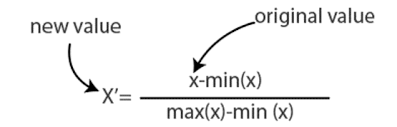

**Standardization**

  - Z-score
    
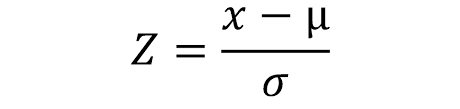
    
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "C:\\Users\\DBRok\\Downloads\\Visadataset.csv"

visa_df = pd.read_csv(file_path)

visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
min_wage = visa_df['prevailing_wage'].min()
max_wage = visa_df['prevailing_wage'].max()
dr = max_wage-min_wage
nr = visa_df['prevailing_wage']-min_wage
visa_df['prevailing_wage_norm'] = nr/dr

In [7]:
visa_df[['prevailing_wage','prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [10]:
visa_df['prevailing_wage_norm'].max(),visa_df['prevailing_wage_norm'].min()

(1.0, 0.0)

In [11]:
visa_df['prevailing_wage'].max(),visa_df['prevailing_wage'].min()

(319210.27, 2.1367)

In [12]:
max_id = visa_df['prevailing_wage_norm'].idxmax()
min_id = visa_df['prevailing_wage_norm'].idxmin()

max_id,min_id

(21077, 20575)

In [13]:
visa_df[['prevailing_wage','prevailing_wage_norm']].iloc[[max_id,min_id]]

,prevailing_wage,prevailing_wage_norm
21077,319210.2700,1.0
20575,2.1367,0.0


**MinMaxScalar**

- MinMaxScalar is a method from sklearn preprocessing

- Read the packages

- Save the package

- Apply fit transform

In [16]:
########### Reading Data Again ###############
file_path = "C:\\Users\\DBRok\\Downloads\\Visadataset.csv"
visa_df = pd.read_csv(file_path)

# step-1
from sklearn.preprocessing import MinMaxScaler

# step-2
mms = MinMaxScaler()

# step-3
mms.fit_transform(visa_df[['prevailing_wage']])


array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])

**Note**:
    
    Inside MinMaxScalar pass dataframe not series

In [17]:
########### Reading Data Again ###############
file_path = "C:\\Users\\DBRok\\Downloads\\Visadataset.csv"
visa_df = pd.read_csv(file_path)

# step-1
from sklearn.preprocessing import MinMaxScaler

# step-2
mms = MinMaxScaler()

# step-3
visa_df['prevailing_wage_norm1']=mms.fit_transform(visa_df[['prevailing_wage']])

In [18]:
visa_df[['prevailing_wage_norm1','prevailing_wage']]

,prevailing_wage_norm1,prevailing_wage
0,0.001849,592.2029
1,0.261345,83425.6500
2,0.385312,122996.8600
3,0.261371,83434.0300
4,0.469616,149907.3900
...,...,...
25475,0.241505,77092.5700
25476,0.874579,279174.7900
25477,0.458311,146298.8500
25478,0.269895,86154.7700


In [20]:
# step-1 : calculate mean
mean_wage = visa_df['prevailing_wage'].mean()
std_wage = visa_df['prevailing_wage'].std()
nr = visa_df['prevailing_wage']-mean_wage
visa_df['prevailing_wage_zscore']=nr/std_wage


In [21]:
visa_df[['prevailing_wage','prevailing_wage_zscore']]

,prevailing_wage,prevailing_wage_zscore
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


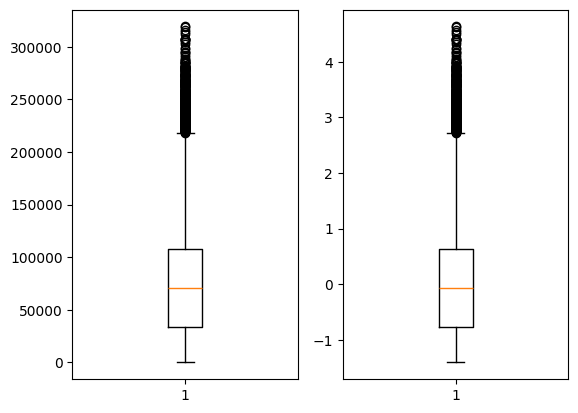

In [23]:
plt.subplot(1,2,1)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage_zscore'])
plt.show()

**StandardScaler**

In [26]:
# task-01
########### Reading Data Again ###############
file_path = "C:\\Users\\DBRok\\Downloads\\Visadataset.csv"
visa_df = pd.read_csv(file_path)


#step-1
from sklearn.preprocessing import StandardScaler

#step-2
ss = StandardScaler()

#step-3
visa_df['prevailing_wage_stdscal'] = ss.fit_transform(visa_df[['prevailing_wage']])


In [27]:
visa_df[['prevailing_wage_stdscal','prevailing_wage']]


,prevailing_wage_stdscal,prevailing_wage
0,-1.398537,592.2029
1,0.169835,83425.6500
2,0.919079,122996.8600
3,0.169994,83434.0300
4,1.428604,149907.3900
...,...,...
25475,0.049924,77092.5700
25476,3.876159,279174.7900
25477,1.360280,146298.8500
25478,0.221509,86154.7700
